In [209]:
import os
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from torchvision import models
from PIL import Image
import pandas as pd


class FeatureExtractor(nn.Module):
    def __init__(self):
        super(FeatureExtractor, self).__init__()
        resnet = models.resnet18(pretrained=True)
        self.features = nn.Sequential(*list(resnet.children())[:-1])

    def forward(self, x):
        return self.features(x)


pics_folder = "train"


model = FeatureExtractor()
model.eval()


transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])


all_features = []

for filename in os.listdir(pics_folder):
    if filename.endswith(".jpg"):
        image_path = os.path.join(pics_folder, filename)
        image = Image.open(image_path).convert("RGB")
        image_tensor = transform(image).unsqueeze(0)

        feature_map = model(image_tensor)

        feature_dict = {"image_id": filename.split('.')[0]}
        for i, feature in enumerate(feature_map.squeeze().detach().numpy()):
            feature_dict[f"feature_{i+1}"] = feature

        all_features.append(feature_dict)


features_df = pd.DataFrame(all_features)


print(features_df)


/opt/homebrew/Caskroom/miniconda/base/envs/dsml4p/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/dsml4p/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


      image_id  feature_1  feature_2  feature_3  feature_4  feature_5  \
0      pug_077   0.011859   0.807569   0.154054   0.820356   0.559054   
1      tmv_106   0.409996   1.138123   0.293083   0.638341   0.586536   
2      npf_041   0.000000   0.570092   0.336959   0.372001   0.075838   
3      ptk_247   0.100118   0.212553   0.092041   0.191920   0.068106   
4      ztb_169   0.152728   0.897255   0.075151   0.474093   1.139407   
...        ...        ...        ...        ...        ...        ...   
70252  wzu_296   0.023289   0.155165   0.046089   0.650007   0.724787   
70253  npf_058   0.033926   1.439011   0.619292   0.079872   0.076329   
70254  zgr_137   0.006089   0.389665   0.202064   1.060436   0.600180   
70255  tgj_057   0.004065   0.452365   0.395266   1.005442   0.715893   
70256  ztb_170   0.298276   0.668934   0.038670   0.603483   1.159487   

       feature_6  feature_7  feature_8  feature_9  ...  feature_503  \
0       0.168335   1.081679   1.246969   0.317930  .

In [260]:
# features_df = features_df[features_df.index.isin()]
features_df

,image_id,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_503,feature_504,feature_505,feature_506,feature_507,feature_508,feature_509,feature_510,feature_511,feature_512
0,pug_077,0.011859,0.807569,0.154054,0.820356,0.559054,0.168335,1.081679,1.246969,0.317930,...,0.147983,1.504436,0.071926,0.277710,0.430578,0.384083,1.009291,0.578690,1.249420,0.234819
1,tmv_106,0.409996,1.138123,0.293083,0.638341,0.586536,0.929880,0.136930,1.328754,0.266694,...,1.222254,0.664281,0.563806,0.271928,0.486683,0.373306,0.507756,0.614423,0.985626,1.329184
2,npf_041,0.000000,0.570092,0.336959,0.372001,0.075838,0.001810,1.005447,0.011987,0.385494,...,0.209215,0.577081,0.012416,0.055253,0.185461,0.766529,0.130216,0.459447,1.325539,0.344669
3,ptk_247,0.100118,0.212553,0.092041,0.191920,0.068106,0.039081,0.033245,1.183538,0.399658,...,0.000000,0.620816,0.007553,0.316717,0.009305,0.464695,0.171825,0.455842,0.489235,0.115968
4,ztb_169,0.152728,0.897255,0.075151,0.474093,1.139407,0.108087,0.146107,0.536629,0.154885,...,0.191619,0.573023,0.031047,0.760973,0.103707,1.252812,0.155654,0.367895,0.382194,0.435029
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70252,wzu_296,0.023289,0.155165,0.046089,0.650007,0.724787,0.083301,0.043823,0.917040,0.025712,...,0.002529,0.206386,0.128786,0.241995,0.071807,0.484251,0.178156,1.175645,0.345347,0.175518
70253,npf_058,0.033926,1.439011,0.619292,0.079872,0.076329,0.000000,0.971291,0.076535,0.336104,...,0.106538,0.373655,0.001866,0.167813,0.209805,0.510082,0.312602,0.233296,1.047785,0.229241
70254,zgr_137,0.006089,0.389665,0.202064,1.060436,0.600180,0.116780,1.135873,1.684028,0.506405,...,0.112739,0.254945,0.019518,0.559942,0.093916,0.894786,0.031924,0.098647,0.663465,0.600891
70255,tgj_057,0.004065,0.452365,0.395266,1.005442,0.715893,0.245187,1.583729,1.952522,0.005674,...,0.231919,0.230526,0.076125,0.411802,0.026310,0.712799,0.606774,0.142215,1.709710,0.092082


In [664]:
cnn_data_path = "merged_data.csv"
cnn_data_df = pd.read_csv(cnn_data_path)


merged_df = pd.merge(cnn_data_df, features_df, on="image_id", how="left")

print(merged_df)


     storm_id  relative_time  ocean  wind_speed image_id  feature_1  \
0         mtw              0      1          30  mtw_000   0.944125   
1         mtw           1800      1          30  mtw_001   0.749517   
2         mtw           3600      1          30  mtw_002   1.092820   
3         mtw           5400      1          30  mtw_003   0.719312   
4         mtw           7200      1          30  mtw_004   0.477592   
...       ...            ...    ...         ...      ...        ...   
9522      ing        1071001      1          65  ing_493   0.322762   
9523      ing        1072799      1          65  ing_494   0.281159   
9524      ing        1074600      1          65  ing_495   0.072380   
9525      ing        1076399      1          65  ing_496   0.040104   
9526      ing        1079999      1          65  ing_497   0.193574   

      feature_2  feature_3  feature_4  feature_5  ...  feature_503  \
0      0.698270   0.183240   0.679063   0.177494  ...     0.091661   
1      

In [680]:
class WindSpeedDataset(Dataset):
    def __init__(self, features_df, sequence_length=10):
        self.features_df = features_df
        self.sequence_length = sequence_length

    def __len__(self):
        return len(self.features_df) - self.sequence_length + 1

    def __getitem__(self, idx):
        sequence = self.features_df.iloc[idx:idx+self.sequence_length]

        features = sequence.iloc[:, 1:-1].values
        target = sequence.iloc[-1, -1]
        return torch.tensor(features, dtype=torch.float32), torch.tensor(target, dtype=torch.float32)



class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size, num_layers=num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out, _ = self.lstm(x)
        out = self.fc(out[:, -1, :])
        return out



def train_lstm_model(train_data, lstm_model, num_epochs=5, batch_size=16, learning_rate=0.001):
    criterion = nn.MSELoss()
    optimizer = torch.optim.Adam(lstm_model.parameters(), lr=learning_rate)
    # print(train_data)
    for epoch in range(num_epochs):
        _loss = 0
        samples = 0
        for storm_id, group_data in train_data.groupby('storm_id'):
            
            group_data = group_data.drop(columns=['storm_id', 'relative_time', 'ocean', ])
            columns = group_data.columns.tolist()
            new_columns = columns[1:] + [columns[0]]
            group_data = group_data[new_columns]
            # print(group_data)
            sequence_length = 10
            wind_speed_dataset = WindSpeedDataset(group_data, sequence_length=sequence_length)
            data_loader = DataLoader(wind_speed_dataset, batch_size=batch_size, shuffle=True)
            
            # for epoch in range(num_epochs):
            for batch_features, batch_targets in data_loader:
                outputs = lstm_model(batch_features)
                loss = criterion(outputs, batch_targets.unsqueeze(1))
                _loss += loss.item()*len(batch_targets)
                samples += len(batch_targets)
                # _loss += loss
                optimizer.zero_grad()
                loss.backward(retain_graph=True)
                optimizer.step()

        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {_loss/samples}')




In [681]:
input_size = 512
hidden_size = 64
num_layers = 2
output_size = 1
lstm_model = LSTMModel(input_size, hidden_size, num_layers, output_size)


In [682]:
input_size

512

In [668]:
merged_df

,storm_id,relative_time,ocean,wind_speed,image_id,feature_1,feature_2,feature_3,feature_4,feature_5,...,feature_503,feature_504,feature_505,feature_506,feature_507,feature_508,feature_509,feature_510,feature_511,feature_512
0,mtw,0,1,30,mtw_000,0.944125,0.698270,0.183240,0.679063,0.177494,...,0.091661,0.737826,0.009016,0.444066,0.433665,1.675609,2.260093,0.728895,0.771604,0.206385
1,mtw,1800,1,30,mtw_001,0.749517,0.621735,0.379228,0.968356,0.125981,...,0.028216,0.682354,0.005826,0.372229,0.076845,1.303343,2.356383,0.411719,0.979158,0.222532
2,mtw,3600,1,30,mtw_002,1.092820,0.764792,0.187647,0.542171,0.093731,...,0.023827,0.800635,0.003157,0.544861,0.245106,1.077590,2.122844,0.616089,0.532878,0.350411
3,mtw,5400,1,30,mtw_003,0.719312,1.078920,0.470365,0.394211,0.036117,...,0.109494,1.040416,0.023851,0.228033,0.176902,1.374283,1.943159,0.452306,0.870737,0.252484
4,mtw,7200,1,30,mtw_004,0.477592,0.986226,0.205190,0.275070,0.062318,...,0.054120,1.076655,0.047361,0.232764,0.303541,1.251609,1.853798,0.329041,1.106784,0.010297
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9522,ing,1071001,1,65,ing_493,0.322762,0.273399,0.399614,0.615337,0.106063,...,0.593126,0.443718,0.004122,0.304850,0.038395,0.253499,0.116404,0.133216,1.473176,0.612883
9523,ing,1072799,1,65,ing_494,0.281159,0.573465,0.190713,1.865466,0.640884,...,0.383187,0.319116,0.102464,0.529358,0.276199,0.367497,0.091170,0.181952,0.752274,0.480256
9524,ing,1074600,1,65,ing_495,0.072380,0.411040,0.042893,1.488231,0.124031,...,0.265255,0.481010,0.027974,0.494771,0.442185,0.254983,0.156153,0.354504,0.722462,0.876562
9525,ing,1076399,1,65,ing_496,0.040104,0.287674,0.045845,1.416777,0.356741,...,0.114409,0.436039,0.003050,0.232894,0.124031,0.133704,0.297670,0.280520,0.569949,0.876464


In [669]:
ids = ['fgi', 'vye', 'xjo', 'vxf']
# test_df  = merged_df[merged_df.storm_id.isin(ids)]
train_df = merged_df[merged_df.storm_id.isin(ids)]



In [670]:
train_df

,storm_id,relative_time,ocean,wind_speed,image_id,feature_1,feature_2,feature_3,feature_4,feature_5,...,feature_503,feature_504,feature_505,feature_506,feature_507,feature_508,feature_509,feature_510,feature_511,feature_512
350,fgi,0,1,30,fgi_000,0.229217,1.362837,0.457893,1.740716,0.670836,...,0.406796,1.033737,0.171420,0.088967,0.527570,2.571349,1.584716,0.946222,1.827265,0.068930
351,fgi,1800,1,30,fgi_001,0.116571,1.256495,0.585310,1.394765,0.428453,...,0.232645,0.895868,0.301941,0.040909,0.447989,2.698558,0.938616,0.873677,1.454649,0.097431
352,fgi,3601,1,30,fgi_002,0.145617,1.072985,0.372684,1.676805,0.541607,...,0.100136,0.603978,0.124130,0.003693,0.605974,2.421711,1.383217,1.275345,1.951872,0.016328
353,fgi,5400,1,30,fgi_003,0.201232,0.894322,0.321274,1.088491,0.350441,...,0.154227,1.022872,0.168214,0.000000,1.415355,2.158933,1.324645,1.147830,1.978894,0.111092
354,fgi,7200,1,30,fgi_004,0.202741,1.291704,0.613454,1.448029,0.512720,...,0.079794,0.705112,0.000000,0.020368,1.211792,2.121902,1.461348,1.129667,1.569058,0.083589
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4188,xjo,674998,1,48,xjo_312,0.030511,1.444204,0.820688,1.133913,0.642241,...,0.032756,0.204082,0.014804,0.476284,0.098470,0.530183,0.508698,0.005242,1.397028,0.232663
4189,xjo,676798,1,48,xjo_313,0.806900,0.888117,0.730595,0.966797,0.602775,...,0.035613,0.221853,0.050456,0.490854,0.045018,0.496194,0.366087,0.044200,0.688659,0.502780
4190,xjo,680399,1,47,xjo_314,0.436918,0.949307,0.471888,0.900975,0.172970,...,0.298163,0.219030,0.118528,0.515863,0.304820,0.454720,0.426325,0.049899,1.388828,0.445684
4191,xjo,682200,1,47,xjo_315,0.032797,0.570119,0.290089,1.588505,0.325557,...,0.612292,0.340617,0.064042,0.528546,0.283705,0.691252,0.171979,0.257775,0.972945,1.002875


/var/folders/gh/63y8bpys6gn5429tcpqcm6cw0000gp/T/ipykernel_19258/1038718946.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['wind_speed'] = scaler.fit_transform(train_df[['wind_speed']])


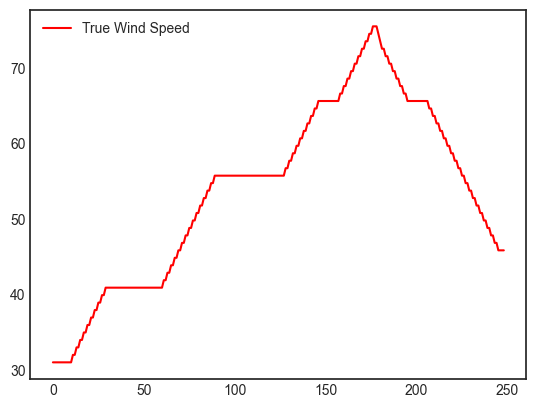

,storm_id,relative_time,ocean,wind_speed,image_id,feature_1,feature_2,feature_3,feature_4,feature_5,...,feature_503,feature_504,feature_505,feature_506,feature_507,feature_508,feature_509,feature_510,feature_511,feature_512
350,fgi,0,1,40.894737,fgi_000,0.229217,1.362837,0.457893,1.740716,0.670836,...,0.406796,1.033737,0.171420,0.088967,0.527570,2.571349,1.584716,0.946222,1.827265,0.068930
351,fgi,1800,1,40.894737,fgi_001,0.116571,1.256495,0.585310,1.394765,0.428453,...,0.232645,0.895868,0.301941,0.040909,0.447989,2.698558,0.938616,0.873677,1.454649,0.097431
352,fgi,3601,1,40.894737,fgi_002,0.145617,1.072985,0.372684,1.676805,0.541607,...,0.100136,0.603978,0.124130,0.003693,0.605974,2.421711,1.383217,1.275345,1.951872,0.016328
353,fgi,5400,1,40.894737,fgi_003,0.201232,0.894322,0.321274,1.088491,0.350441,...,0.154227,1.022872,0.168214,0.000000,1.415355,2.158933,1.324645,1.147830,1.978894,0.111092
354,fgi,7200,1,40.894737,fgi_004,0.202741,1.291704,0.613454,1.448029,0.512720,...,0.079794,0.705112,0.000000,0.020368,1.211792,2.121902,1.461348,1.129667,1.569058,0.083589
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4188,xjo,674998,1,58.705263,xjo_312,0.030511,1.444204,0.820688,1.133913,0.642241,...,0.032756,0.204082,0.014804,0.476284,0.098470,0.530183,0.508698,0.005242,1.397028,0.232663
4189,xjo,676798,1,58.705263,xjo_313,0.806900,0.888117,0.730595,0.966797,0.602775,...,0.035613,0.221853,0.050456,0.490854,0.045018,0.496194,0.366087,0.044200,0.688659,0.502780
4190,xjo,680399,1,57.715789,xjo_314,0.436918,0.949307,0.471888,0.900975,0.172970,...,0.298163,0.219030,0.118528,0.515863,0.304820,0.454720,0.426325,0.049899,1.388828,0.445684
4191,xjo,682200,1,57.715789,xjo_315,0.032797,0.570119,0.290089,1.588505,0.325557,...,0.612292,0.340617,0.064042,0.528546,0.283705,0.691252,0.171979,0.257775,0.972945,1.002875


In [760]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(new_merged_df['wind_speed'].min(), new_merged_df['wind_speed'].max()))
train_df['wind_speed'] = scaler.fit_transform(train_df[['wind_speed']])
plt.plot(train_df[train_df.storm_id=='vye']['wind_speed'].values, 'r', label='True Wind Speed')
plt.legend()
plt.show()
train_df

In [683]:
batch_size = 16
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(lstm_model.parameters(), lr=0.0001)
num_epochs = 200

In [686]:
train_lstm_model(train_df, lstm_model, num_epochs, batch_size, 0.0001)

Epoch [1/200], Loss: 6.156673107007389
Epoch [2/200], Loss: 6.024637218438844
Epoch [3/200], Loss: 5.89078206611912
Epoch [4/200], Loss: 5.739468913192066
Epoch [5/200], Loss: 5.636513791904298
Epoch [6/200], Loss: 5.552988579359727
Epoch [7/200], Loss: 5.360622311977458
Epoch [8/200], Loss: 5.285665779239378
Epoch [9/200], Loss: 5.2253807472661284
Epoch [10/200], Loss: 5.173235207914595
Epoch [11/200], Loss: 5.1455811004989425
Epoch [12/200], Loss: 5.0639268458778295
Epoch [13/200], Loss: 4.9113381090860955
Epoch [14/200], Loss: 4.764042134891092
Epoch [15/200], Loss: 4.67037657978639
Epoch [16/200], Loss: 4.507732074226348
Epoch [17/200], Loss: 4.421876355857545
Epoch [18/200], Loss: 4.327626229184226
Epoch [19/200], Loss: 4.256675236489972
Epoch [20/200], Loss: 4.155351807961377
Epoch [21/200], Loss: 4.077699128249531
Epoch [22/200], Loss: 4.110423948312137
Epoch [23/200], Loss: 4.059401504621354
Epoch [24/200], Loss: 3.904296460552197
Epoch [25/200], Loss: 3.8056556186074055
Epoch 

In [606]:
def test_lstm_model(test_data, lstm_model, batch_size=32):
    criterion = nn.MSELoss()
    lstm_model.eval()

    sequence_length = 10
           

    total_loss = 0.0
    total_samples = 0

    with torch.no_grad():
        _loss = 0
        for storm_id, group_data in test_data.groupby('storm_id'):
            group_data = group_data.drop(columns=['storm_id', 'relative_time', 'ocean', ])
            columns = group_data.columns.tolist()
            new_columns = columns[1:] + [columns[0]]
            group_data = group_data[new_columns]
            wind_speed_dataset = WindSpeedDataset(group_data, sequence_length=sequence_length)
            test_data_loader = DataLoader(wind_speed_dataset, batch_size=batch_size, shuffle=True)
     
            for batch_features, batch_targets in test_data_loader:
                outputs = lstm_model(batch_features)
                loss = criterion(outputs, batch_targets.unsqueeze(1))
                print(outputs.numpy().T[0], batch_targets.numpy())
                _loss += loss
                total_loss += loss.item() * len(batch_targets)
                total_samples += len(batch_targets)
        print(_loss.item())
    average_loss = total_loss / total_samples
    print(f'Test Loss: {average_loss:.4f}')


In [609]:
test_lstm_model(tdf, lstm_model, 1)


[34.649666] [29.]
31.918724060058594
Test Loss: 31.9187


In [756]:
import matplotlib.pyplot as plt
window_size = 10
def sliding_window(data, window_size):
    features_list, labels_list = [], []
    for i in range(len(data) - window_size + 1 - 10, len(data) - window_size + 1):
        window_data = data[i:i+window_size]
        # features = window_data.drop(columns=['storm_id', 'ocean', 'image_id', 'relative_time', 'wind_speed']).values
        features = window_data.drop(columns=['image_id', 'wind_speed']).values
        label = window_data['wind_speed'].values[-1]
        features_list.append(features)
        labels_list.append(label)
    return np.array(features_list), np.array(labels_list)


In [615]:
pics_folder = "surprise_storm_image"
model = FeatureExtractor()
model.eval()
all_features = []
for filename in os.listdir(pics_folder):
    if filename.endswith(".jpg"):
        image_path = os.path.join(pics_folder, filename)
        image = Image.open(image_path).convert("RGB")
        image_tensor = transform(image).unsqueeze(0)

        feature_map = model(image_tensor)

        feature_dict = {"image_id": filename.split('.')[0]}
        for i, feature in enumerate(feature_map.squeeze().detach().numpy()):
            feature_dict[f"feature_{i+1}"] = feature

        all_features.append(feature_dict)


new_features_df = pd.DataFrame(all_features)


print(new_features_df)


/opt/homebrew/Caskroom/miniconda/base/envs/dsml4p/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/dsml4p/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


    image_id  feature_1  feature_2  feature_3  feature_4  feature_5  \
0    tst_198   0.130328   1.761892   0.405098   1.708804   0.524586   
1    tst_173   0.599584   0.591530   0.012026   0.789445   0.187864   
2    tst_167   0.068154   0.181017   0.055769   2.063262   1.884383   
3    tst_007   0.012791   2.979944   0.343537   0.486923   0.019829   
4    tst_013   0.053529   2.805280   0.262886   0.130397   0.153535   
..       ...        ...        ...        ...        ...        ...   
247  tst_022   0.000000   2.779748   0.979204   0.108683   0.224363   
248  tst_142   0.791435   0.658627   0.091402   0.785577   1.992360   
249  tst_156   0.507776   1.990437   0.000000   1.275257   1.420356   
250  tst_181   0.709835   0.378265   0.164051   0.352282   1.086728   
251  tst_195   0.052636   0.879063   0.404762   0.502615   0.209822   

     feature_6  feature_7  feature_8  feature_9  ...  feature_503  \
0     0.884611   1.262722   0.787837   1.008082  ...     0.629856   
1     0.4

In [769]:
cnn_data_path = "data_tst.csv"
cnn_data_df = pd.read_csv(cnn_data_path)
new_merged_df = pd.merge(cnn_data_df, new_features_df, on="image_id", how="left")

print(new_merged_df)


    storm_id  relative_time  ocean  wind_speed image_id  feature_1  feature_2  \
0        tst              0      1        31.0  tst_000   0.253864   2.683766   
1        tst           1800      1        32.0  tst_001   0.222728   2.251036   
2        tst           3601      1        33.0  tst_002   0.121357   2.408052   
3        tst           5400      1        33.0  tst_003   0.030753   3.436395   
4        tst           7200      1        34.0  tst_004   0.023712   2.703911   
..       ...            ...    ...         ...      ...        ...        ...   
250      tst         539999      1         NaN  tst_250   0.256084   0.860314   
251      tst         541799      1         NaN  tst_251   0.736789   2.078861   
252      tst         543599      1         NaN  tst_252        NaN        NaN   
253      tst         545399      1         NaN  tst_253        NaN        NaN   
254      tst         547199      1         NaN  tst_254        NaN        NaN   

     feature_3  feature_4  

In [770]:
new_df = new_merged_df[:]
new_df

,storm_id,relative_time,ocean,wind_speed,image_id,feature_1,feature_2,feature_3,feature_4,feature_5,...,feature_503,feature_504,feature_505,feature_506,feature_507,feature_508,feature_509,feature_510,feature_511,feature_512
0,tst,0,1,31.0,tst_000,0.253864,2.683766,0.236927,0.305156,0.352107,...,1.190531,0.715563,0.161097,0.641598,0.737630,0.387561,0.152709,0.232755,1.272518,1.082678
1,tst,1800,1,32.0,tst_001,0.222728,2.251036,0.294600,0.163029,0.161877,...,1.387395,0.686846,0.003000,0.541749,0.809813,0.181354,0.463815,0.185061,1.560250,0.606770
2,tst,3601,1,33.0,tst_002,0.121357,2.408052,0.252694,0.028164,0.052781,...,1.251747,0.982607,0.005957,0.592557,0.779334,0.108757,0.397875,0.020360,1.285510,0.991123
3,tst,5400,1,33.0,tst_003,0.030753,3.436395,0.145525,0.182201,0.115081,...,1.289519,1.084308,0.152005,0.273277,0.826521,0.255024,0.188492,0.154091,1.264988,0.647586
4,tst,7200,1,34.0,tst_004,0.023712,2.703911,0.068276,0.216655,0.094752,...,1.105290,0.933157,0.297464,0.432387,0.736380,0.545954,0.138617,0.137584,1.153430,0.819152
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,tst,539999,1,NaN,tst_250,0.256084,0.860314,0.508501,0.797233,0.268880,...,0.076742,0.781350,0.000000,0.427418,0.398036,0.341469,0.037307,0.058719,0.719807,0.649078
251,tst,541799,1,NaN,tst_251,0.736789,2.078861,0.372064,1.051763,0.670629,...,0.037778,0.558008,0.000000,1.153108,0.186247,0.467130,0.349191,0.165015,0.487559,0.578737
252,tst,543599,1,NaN,tst_252,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
253,tst,545399,1,NaN,tst_253,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


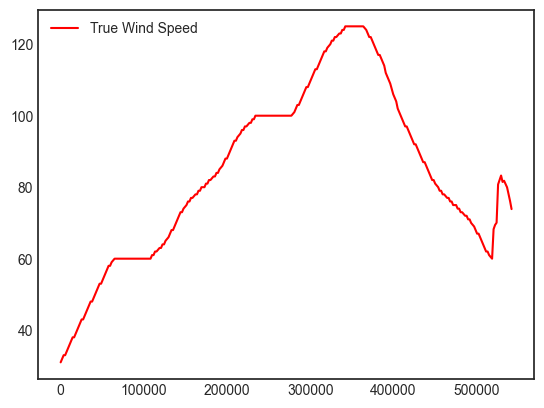

In [768]:
plt.plot(new_df['relative_time'], new_df['wind_speed'].values, 'r', label='True Wind Speed')
plt.legend()
plt.show()

In [771]:
seq_len = 10

for i in range(len(new_df) - seq_len + 1 - 10-3, len(new_df) - seq_len-2 + 1):
    # print(i)
    window_data = new_df.iloc[i:i+seq_len, 5:].values
    print(new_df.iloc[i:i+seq_len])
    window_data = torch.tensor(window_data, dtype=torch.float32).unsqueeze(0)
    # print(window_data.shape)
    prediction = 0
    with torch.no_grad():
        prediction = lstm_model(window_data)
    prediction_value = prediction[0][-1].item()
    print(prediction_value)
    new_df.at[i + seq_len-1, 'wind_speed'] = prediction_value
print(new_df[230:])


    storm_id  relative_time  ocean  wind_speed image_id  feature_1  feature_2  \
233      tst         502201      1        67.0  tst_233   0.133371   1.159292   
234      tst         504000      1        66.0  tst_234   0.086090   1.054937   
235      tst         507600      1        64.0  tst_235   0.055690   0.880016   
236      tst         509400      1        63.0  tst_236   0.058196   1.105729   
237      tst         511201      1        62.0  tst_237   0.079416   1.009398   
238      tst         513000      1        62.0  tst_238   0.032579   1.239632   
239      tst         514800      1        61.0  tst_239   0.081719   1.232575   
240      tst         518400      1        60.0  tst_240   0.077707   1.162277   
241      tst         520201      1        59.0  tst_241   0.421624   1.669690   
242      tst         522000      1         NaN  tst_242   0.182125   1.196871   

     feature_3  feature_4  feature_5  ...  feature_503  feature_504  \
233   0.519705   0.167629   0.289694 

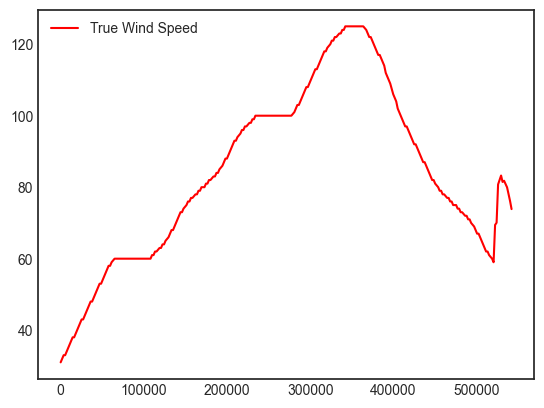

In [772]:
new_df[:253]
plt.plot(new_df['relative_time'], new_df['wind_speed'].values, 'r', label='True Wind Speed')
plt.legend()
plt.show()

In [754]:
plt.style.use('seaborn-v0_8-white')

tensor([[51.7733]])
tensor([[52.2119]])
tensor([[53.6460]])
tensor([[55.6829]])
tensor([[56.2696]])
tensor([[57.6817]])
tensor([[59.1580]])
tensor([[61.3048]])
tensor([[62.1284]])
tensor([[63.3914]])
tensor([[60.9820]])
tensor([[61.9525]])
tensor([[61.9556]])
tensor([[62.3864]])
tensor([[61.9412]])
tensor([[62.5032]])
tensor([[62.4741]])
tensor([[62.1796]])
tensor([[62.6179]])
tensor([[64.4737]])
tensor([[65.3377]])
tensor([[63.9519]])
tensor([[60.4205]])
tensor([[58.5573]])
tensor([[57.8520]])
tensor([[56.4039]])
tensor([[56.6763]])
tensor([[58.0677]])
tensor([[58.8328]])
tensor([[59.0715]])
tensor([[58.8740]])
tensor([[59.2522]])
tensor([[59.7334]])
tensor([[59.8098]])
tensor([[60.5298]])
tensor([[60.7954]])
tensor([[61.5160]])
tensor([[61.6873]])
tensor([[62.1602]])
tensor([[59.4353]])
tensor([[59.0135]])
tensor([[56.5932]])
tensor([[53.3558]])
tensor([[53.1782]])
tensor([[52.0850]])
tensor([[53.1430]])
tensor([[53.5779]])
tensor([[54.2272]])
tensor([[54.8316]])
tensor([[55.3332]])


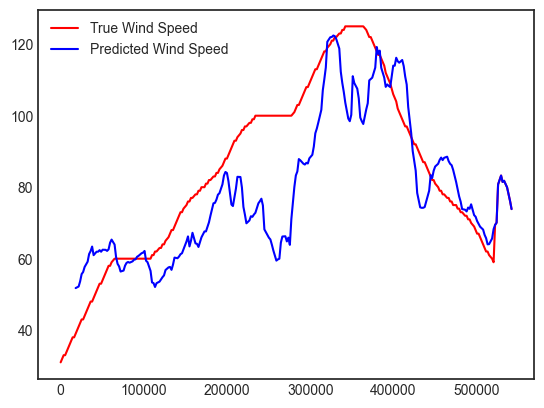

In [755]:
lstm_model.eval()
predictions = []

with torch.no_grad():
    for i in range(len(features)):
        inputs = features[i:i+1]
        # print(inputs.shape)
        outputs = lstm_model(inputs)
        print(outputs)
        
        predictions.append(outputs.item())

plt.plot(new_merged_df['relative_time'], new_merged_df['wind_speed'].values, 'r', label='True Wind Speed')
plt.plot(new_merged_df['relative_time'][9:], predictions, 'b', label='Predicted Wind Speed')
plt.legend()
plt.show()
# print(predictions)